Question 1

from 0 to 50
f1(x) = x

from 51 to 150
f2(x) = (155x / 100) + (255 - (155*150/100))

from 151 to 255
f3(x) = x

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image = cv.imread('emma_new.jpg', cv.IMREAD_GRAYSCALE)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

t1 = np.arange(0,51).astype(np.uint8)
t2 = (np.arange(51,151).astype(np.uint8))*1.55 + (255 - 155*1.5)
t3 = np.arange(151,256).astype(np.uint8)
trans = np.concatenate((t1,t2,t3)).astype(int)

print(type(t))


<class 'numpy.ndarray'>


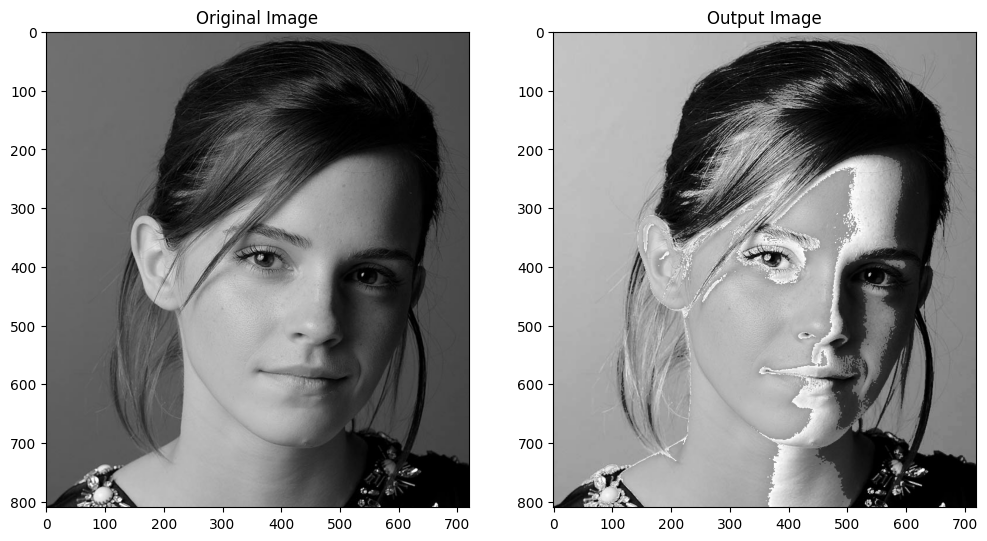

In [11]:

transformed = trans[image]


plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(transformed, cmap = 'gray')
plt.title('Output Image')

plt.show()


*Question 02*

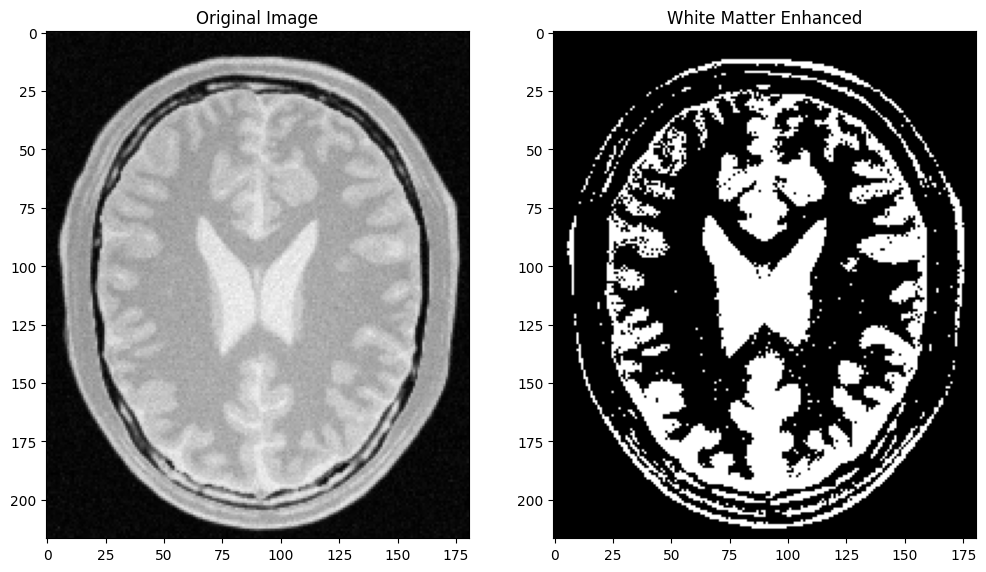

In [37]:
image2 = cv.imread('BrainProtonDensitySlice9.png')
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

divert_point = 184
coordinates = np.array([(1,0),(divert_point,0),(divert_point+1,255),(255,255)])
trans = np.array([0])


for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans , line)).astype(np.uint8)

#print(t)

transformed = trans[image2]

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image2)
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(transformed)
plt.title('White Matter Enhanced')

plt.show()



Gray Matter Enhanced

256


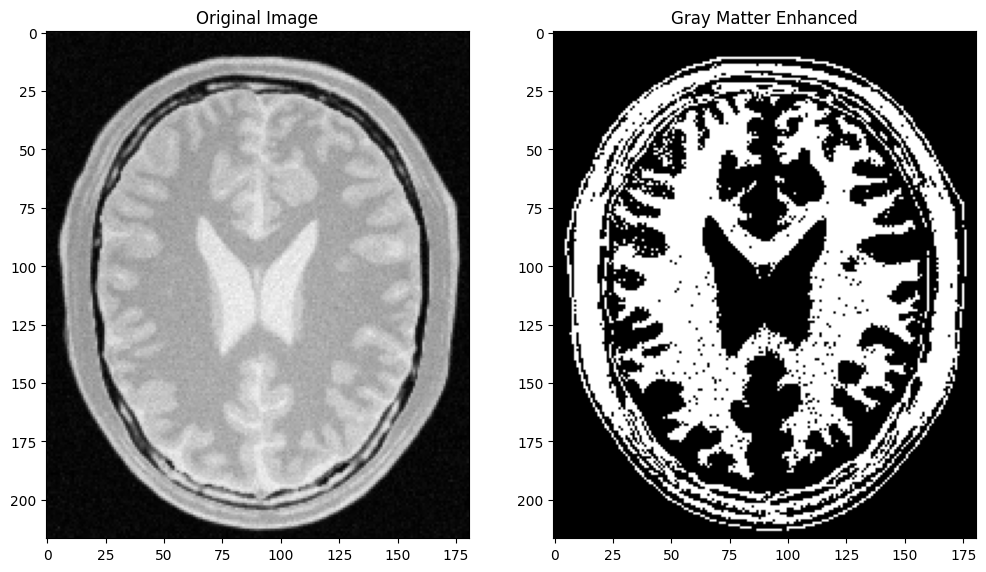

In [19]:
divert_point1 = 50
divert_point2 = 180

coordinates = np.array([(1,0),(divert_point1,0),
                        (divert_point1+1,255),(divert_point2,255),
                        (divert_point2+1,0),(255,0)])

trans = np.array([0])

for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans, line)).astype(np.uint8)

print(len(trans))

transformed = trans[image2]

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image2)
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(transformed)
plt.title('Gray Matter Enhanced')

plt.show()


*Question 03*

Text(0.5, 1.0, 'Gamma Corrected Image')

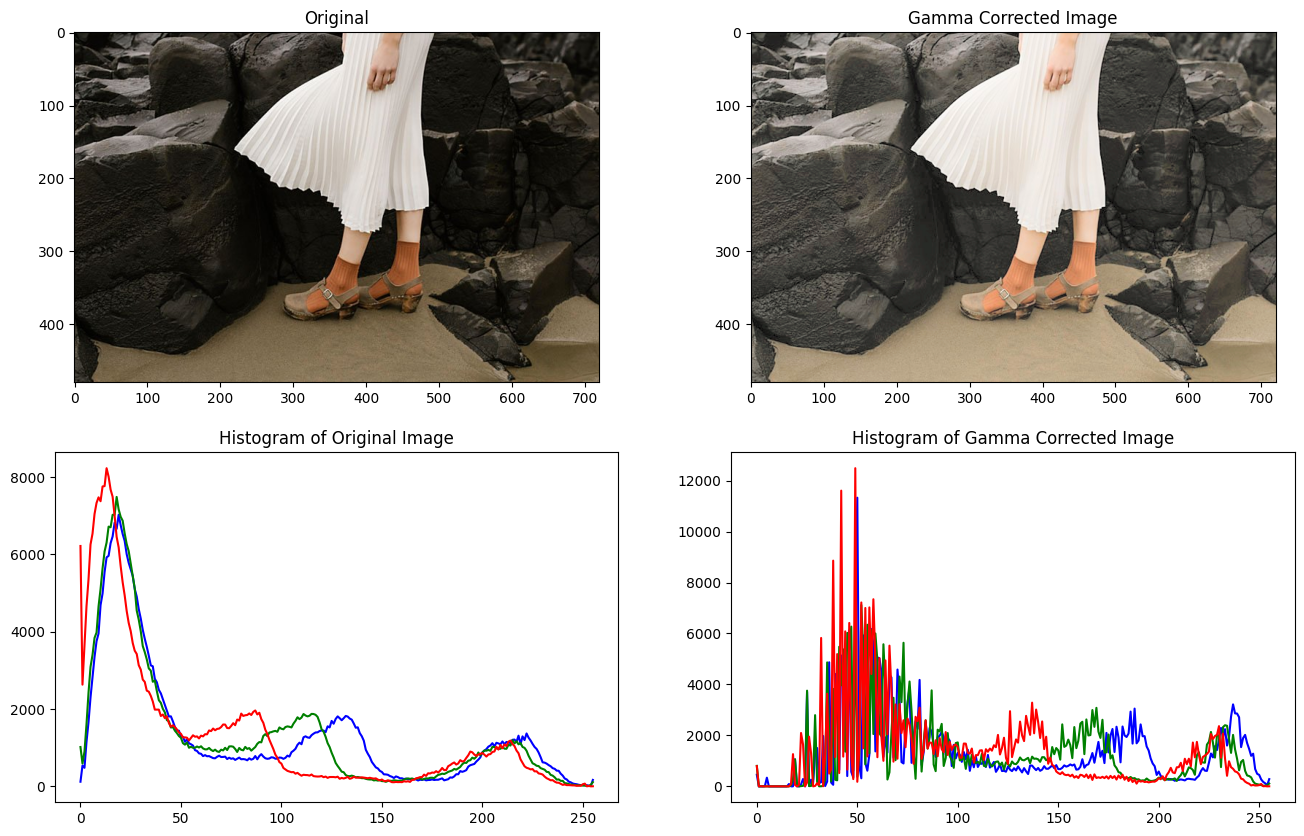

In [16]:
image3 = cv.imread('highlights_and_shadows.jpg')
image3_copy = image3.copy()
image3_copy = cv.cvtColor(image3_copy,cv.COLOR_BGR2RGB)
image3 = cv.cvtColor(image3, cv.COLOR_BGR2LAB)
l_img , a_img , b_img = cv.split(image3)

gamma = 0.5

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype(np.uint8)
img_gamma = cv.LUT(l_img, table)

final_image = cv.merge((img_gamma, a_img, b_img))
final_image = cv.cvtColor(final_image, cv.COLOR_LAB2RGB)

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.imshow(image3_copy)
plt.title('Original')


color = ('b','g','r')
for i,c in enumerate(color) :
    hist_orig = cv.calcHist([image3_copy], [i], None, [256],[0,256])
    plt.subplot(2,2,3)
    plt.plot(hist_orig, color = c)

    hist_gamma = cv.calcHist([final_image],[i],None,[256], [0,256])
    plt.subplot(2,2,4)
    plt.plot(hist_gamma, color = c)


plt.subplot(2,2,3)
plt.title('Histogram of Original Image')

plt.subplot(2,2,4)
plt.title('Histogram of Gamma Corrected Image')

plt.subplot(2,2,2)
plt.imshow(final_image)
plt.title('Gamma Corrected Image')




*Question 04*

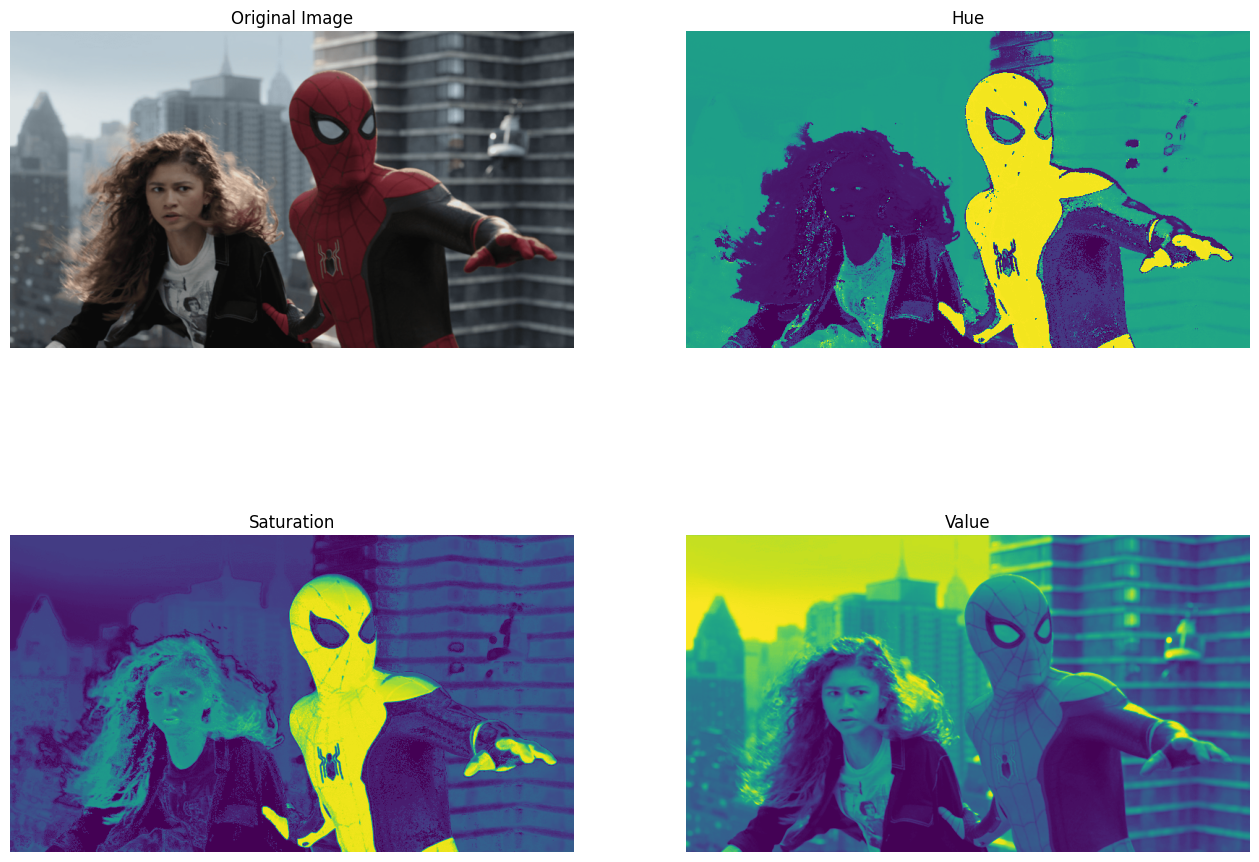

In [4]:
image4 = cv.imread('spider.png')
image4_copy = image4.copy()
image4_copy = cv.cvtColor(image4_copy, cv.COLOR_BGR2RGB)
#image4 = cv.cvtColor(image4,cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.imshow(image4_copy)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(hue)
plt.title('Hue')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(saturation)
plt.title('Saturation')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(value)
plt.title('Value')
plt.axis('off')

plt.show()


[7.81250000e-03 1.00781167e+00 2.00780940e+00 3.00780535e+00
 4.00779963e+00 5.00779247e+00 6.00778389e+00 7.00777340e+00
 8.00776196e+00 9.00774860e+00 1.00077333e+01 1.10077162e+01
 1.20076990e+01 1.30076790e+01 1.40076580e+01 1.50076351e+01
 1.60078125e+01 1.70077858e+01 1.80077591e+01 1.90077286e+01
 2.00076981e+01 2.10076656e+01 2.20076332e+01 2.30077991e+01
 2.40077610e+01 2.50077229e+01 2.60076828e+01 2.70076408e+01
 2.80077991e+01 2.90077553e+01 3.00077076e+01 3.10076599e+01
 3.20078125e+01 3.30077591e+01 3.40077095e+01 3.50076523e+01
 3.60078011e+01 3.70077400e+01 3.80076828e+01 3.90076218e+01
 4.00077629e+01 4.10076981e+01 4.20076332e+01 4.30077667e+01
 4.40076981e+01 4.50076294e+01 4.60077591e+01 4.70076866e+01
 4.80078125e+01 4.90077362e+01 5.00076561e+01 5.10077782e+01
 5.20076981e+01 5.30076180e+01 5.40077324e+01 5.50076485e+01
 5.60077629e+01 5.70076714e+01 5.80077820e+01 5.90076904e+01
 6.00078011e+01 6.10077057e+01 6.20078087e+01 6.30077095e+01
 6.40078125e+01 6.500771

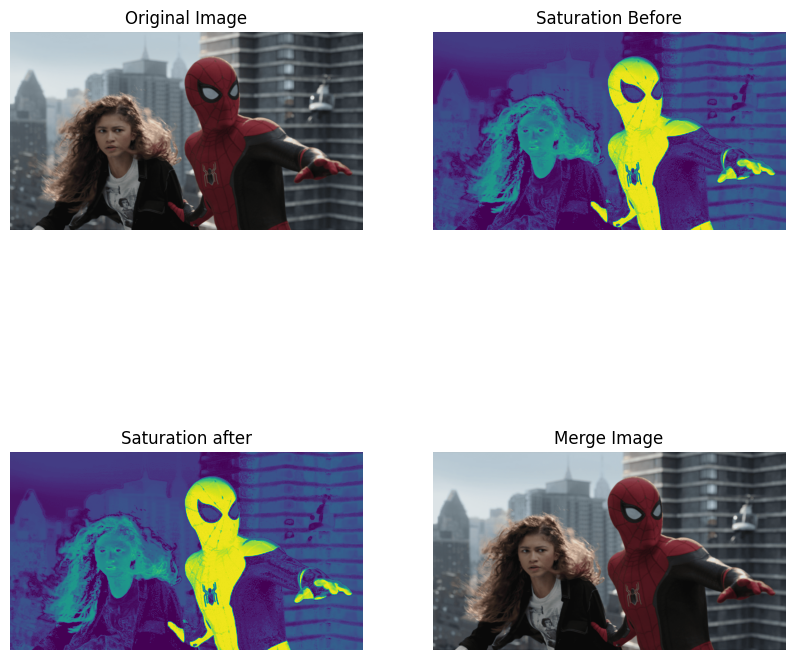

In [6]:
a = 1
alpha = 70

x = np.arange(0,256,1).astype(np.uint8)

new_x = x + (a / 128) * np.exp((-1 * (x - 128)**2) / (2 * alpha**2))
new_x = np.clip(new_x, 0, 255)
new_x = np.array(new_x).astype(np.float32)
print(new_x)

sat_update = cv.LUT(saturation, new_x)
print(sat_update)

merge_img = cv.merge((hue, saturation , value))
merge_img = cv.cvtColor(merge_img, cv.COLOR_HSV2RGB)
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.imshow(image4_copy)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(saturation)
plt.title('Saturation Before')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sat_update)
plt.title('Saturation after')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(merge_img)
plt.title('Merge Image')
plt.axis('off')

plt.show()